# Manutenção Preditiva - Sistema de Propulsão Naval

O presente trabalho tem como objetivo a mineração de padrões em dados de manutenção preditiva em um sistema de propulsão naval. O dataset utilizado foi disponibilizado é um dataset simulado em um modelo de um sistema de propulsão naval de uma fragata que utiliza uma turbina a gás como motor. O dataset foi disponibilizado pelos autores (M Altosole, G Benvenuto, M Figari, and U Campora) no repositório da UCI: http://archive.ics.uci.edu/ml/datasets/condition+based+maintenance+of+naval+propulsion+plants

![fragata](img/frigate.png)

Turbina a Gás:
![turbina](img/gas_turbine.png)
https://www.geaviation.com/sites/default/files/ge-marine-gas-turbines-for-frigates-2018-march.pdf

Sistema de propulsão:
![propulsao](img/propulsion.png)
https://navalpost.com/propulsion-systems-navies-gas-diesel-electric/


In [1]:
import pandas as pd
import numpy as np

Data Set Information:

The experiments have been carried out by means of a numerical simulator of a naval vessel (Frigate) characterized by a Gas Turbine (GT) propulsion plant. The different blocks forming the complete simulator (Propeller, Hull, GT, Gear Box and Controller) have been developed and fine tuned over the year on several similar real propulsion plants. In view of these observations the available data are in agreement with a possible real vessel.
In this release of the simulator it is also possible to take into account the performance decay over time of the GT components such as GT compressor and turbines.
The propulsion system behaviour has been described with this parameters:
- Ship speed (linear function of the lever position lp).
- Compressor degradation coefficient kMc.
- Turbine degradation coefficient kMt.
so that each possible degradation state can be described by a combination of this triple (lp,kMt,kMc).
The range of decay of compressor and turbine has been sampled with an uniform grid of precision 0.001 so to have a good granularity of representation.
In particular for the compressor decay state discretization the kMc coefficient has been investigated in the domain [1; 0.95], and the turbine coefficient in the domain [1; 0.975].
Ship speed has been investigated sampling the range of feasible speed from 3 knots to 27 knots with a granularity of representation equal to tree knots.
A series of measures (16 features) which indirectly represents of the state of the system subject to performance decay has been acquired and stored in the dataset over the parameter's space.
Check the README.txt file for further details about this dataset.


Dicionário de dados:
- 1 - Lever position (lp) [ ]
- 2 - Ship speed (v) [knots]
- 3 - Gas Turbine shaft torque (GTT) [kN m]
- 4 - Gas Turbine rate of revolutions (GTn) [rpm]
- 5 - Gas Generator rate of revolutions (GGn) [rpm]
- 6 - Starboard Propeller Torque (Ts) [kN]
- 7 - Port Propeller Torque (Tp) [kN]
- 8 - HP Turbine exit temperature (T48) [C]
- 9 - GT Compressor inlet air temperature (T1) [C]
- 10 - GT Compressor outlet air temperature (T2) [C]
- 11 - HP Turbine exit pressure (P48) [bar]
- 12 - GT Compressor inlet air pressure (P1) [bar]
- 13 - GT Compressor outlet air pressure (P2) [bar]
- 14 - Gas Turbine exhaust gas pressure (Pexh) [bar]
- 15 - Turbine Injecton Control (TIC) [%]
- 16 - Fuel flow (mf) [kg/s]
- 17 - GT Compressor decay state coefficient.
- 18 - GT Turbine decay state coefficient. 

In [2]:
features = [
    'lp',
    'v',
    'GTT',
    'GTn',
    'GGn',
    'Ts',
    'Tp',
    'T48',
    'T1',
    'T2',
    'P48',
    'P1',
    'P2',
    'Pexh',
    'TIC',
    'mf',
    'kMc',
    'kMt'
]

In [3]:
df = pd.read_csv('./data/data.txt', sep='   ', names=features, engine='python')

In [4]:
df.head()

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,mf,kMc,kMt
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [5]:
df.shape

(11934, 18)

In [6]:
df.dtypes

lp      float64
v       float64
GTT     float64
GTn     float64
GGn     float64
Ts      float64
Tp      float64
T48     float64
T1      float64
T2      float64
P48     float64
P1      float64
P2      float64
Pexh    float64
TIC     float64
mf      float64
kMc     float64
kMt     float64
dtype: object

In [7]:
df.isna().sum()

lp      0
v       0
GTT     0
GTn     0
GGn     0
Ts      0
Tp      0
T48     0
T1      0
T2      0
P48     0
P1      0
P2      0
Pexh    0
TIC     0
mf      0
kMc     0
kMt     0
dtype: int64

In [8]:
df.describe()

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,mf,kMc,kMt
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lp      11934 non-null  float64
 1   v       11934 non-null  float64
 2   GTT     11934 non-null  float64
 3   GTn     11934 non-null  float64
 4   GGn     11934 non-null  float64
 5   Ts      11934 non-null  float64
 6   Tp      11934 non-null  float64
 7   T48     11934 non-null  float64
 8   T1      11934 non-null  float64
 9   T2      11934 non-null  float64
 10  P48     11934 non-null  float64
 11  P1      11934 non-null  float64
 12  P2      11934 non-null  float64
 13  Pexh    11934 non-null  float64
 14  TIC     11934 non-null  float64
 15  mf      11934 non-null  float64
 16  kMc     11934 non-null  float64
 17  kMt     11934 non-null  float64
dtypes: float64(18)
memory usage: 1.6 MB


## Verificando a presença de outliers nos dados

In [10]:
import matplotlib.pyplot as plt

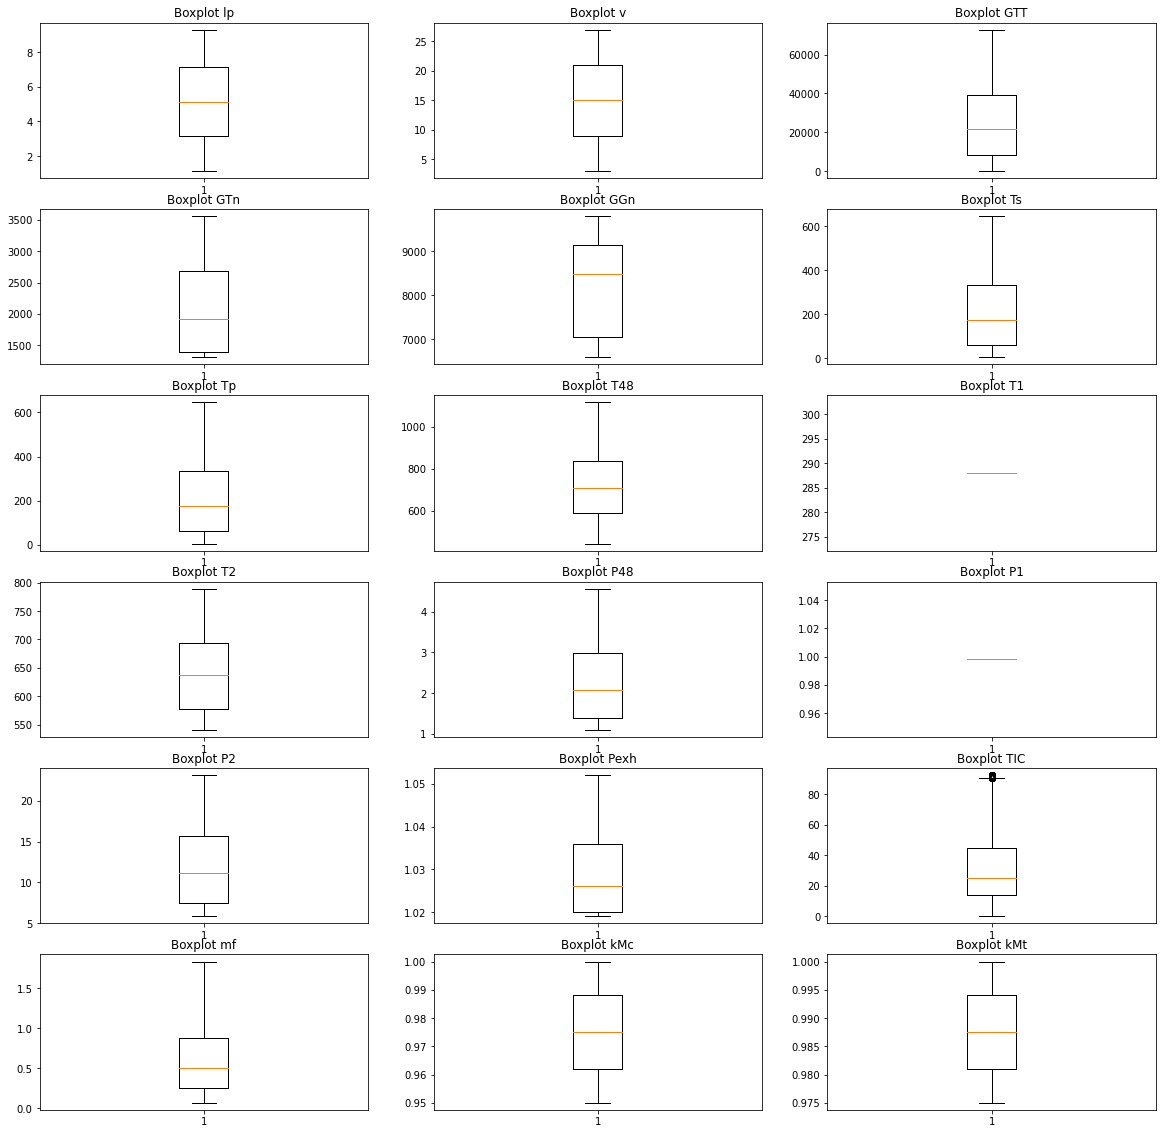

In [29]:
fig, ax_matrix = plt.subplots(6, 3, figsize=(20, 20));

# Atribuir um subgráfico para cada feature
mapeamento = {}
for (i, f) in enumerate(features):
    mapeamento[f] = ax_matrix[i//3][i%3]

for feat in features:
    mapeamento[feat].set_title(f'Boxplot {feat}')
    mapeamento[feat].boxplot(df[feat])
    
plt.show()

## Constatações:
- As features T1 e P1 não apresentam variabilidade e podem ser eliminadas do dataset, porque não contribuem para a previsibilidade das variáveis target;
- A feature TIC apresenta outliers que merecem ser investigados mais a fundo;